# 1. Pengumpulan Data ( Web Scraping )

## Instalasi dan Import Library

In [ ]:
# Instalasi dan Import Library yang dibutuhkan
!pip install google-play-scraper pandas

# Import library scraping dan pandas
from google_play_scraper import reviews_all
import pandas as pd
from datetime import datetime

## Mulai Pengumpulan Data dengan Scraping dan Inputkan Parameter

In [ ]:
# Scraping Ulasan Aplikasi Bibit
app_id = 'com.bibit.bibitid'  # ID aplikasi Bibit

# Ambil semua ulasan
try:
    ulasan = reviews_all(
        app_id,
        lang='id',
        country='id'
    )
    print(f"Jumlah ulasan yang berhasil diambil: {len(ulasan)}")
except Exception as e:
    print("Error saat mengambil data:", e)
    ulasan = []

Jumlah ulasan yang berhasil diambil: 46052


## Konversi Data Ulasan ke DataFrame dan Filter Tanggal

In [ ]:
# Konversi ke DataFrame
df = pd.DataFrame(ulasan)

# Filter berdasarkan rentang tanggal yang diinginkan
df['at'] = pd.to_datetime(df['at'])  # pastikan kolom waktu jadi datetime
start_date = "2024-04-01"
end_date = "2025-04-14"
df = df[(df['at'] >= start_date) & (df['at'] <= end_date)]

# Menampilkan hasil
print("Data yang berhasil dikumpulkan : ", len(df))
df.head()

Data yang berhasil dikumpulkan :  2586


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
101,b3850ff9-769b-4a62-904e-46e8baa44151,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baru mulai belajar menabung saham semoga jadi ...,5,0,3.94.0,2025-04-13 21:57:00,Terima kasih telah memilih Bibit sebagai platf...,2025-04-14 04:48:20,3.94.0
102,9f347712-c757-443d-be42-95dab637f170,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi bagus,5,0,3.94.0,2025-04-13 15:20:39,Terima kasih atas kepercayaan kakak memilih Bi...,2025-04-14 04:48:11,3.94.0
103,fb892aa6-b385-4249-8e36-3b562e0eb66f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,4,0,3.94.0,2025-04-13 10:17:42,"Hai kak, kemungkinan jaringan internet kakak t...",2025-04-14 04:48:44,3.94.0
104,532a5a32-0b8b-4ea4-b4ca-55537883ae1a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ini termasuk apk investasi buat pemula yg bagu...,5,0,3.94.0,2025-04-13 07:01:29,Terima kasih telah menjadi pengguna setia Bibi...,2025-04-14 04:47:59,3.94.0
105,35b39682-07f8-4bc8-ba1b-d10107c1e3f1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,perbaiki terus sistem apk nya,2,0,3.94.0,2025-04-13 05:16:33,"Hai kak, jika memiliki pertanyaan atau mengala...",2025-04-13 06:11:55,3.94.0


## Atur kolom, bersihkan kolom content dari koma dan simpan Data Ulasan Bibit ke CSV

In [ ]:
# Filter kolom yang diperlukan
df_filtered = df[['userName', 'at', 'score', 'content']]

# Bersihkan Content
df_filtered['content'] = (
    df_filtered['content']
    .str.replace(",", " ", regex=False)
    .str.replace('"', "", regex=False)
    .str.replace(".", " ", regex=False)
)

# Simpan ke CSV (Data Tanpa Label)
csv_cleaned = "ulasan_bibit.csv"
df_filtered.to_csv(csv_cleaned, index=False, encoding="utf-8")
print(f"Data disimpan ke {csv_cleaned}")

# Unduh File
from google.colab import files
files.download(csv_cleaned)

Data disimpan ke ulasan_bibit.csv


<ipython-input-4-a09624cbf429>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['content'] = (


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Pelabelan Data

## Import Data Ulasan Bibit (Non Label)

In [ ]:
# Import Data Ulasan Bibit
csv_bibit = "ulasan_bibit.csv"
df = pd.read_csv(csv_bibit)

## Label Sentimen Berdasarkan Score (Rating)

In [ ]:
# Fungsi untuk memberi label sentimen (Rating)
def label_sentimen(score):
    if score >= 4:
        return "Positif"
    elif score == 3:
        return "Netral"
    else:
        return "Negatif"

# Tambahkan kolom sentimen
df['sentimen'] = df['score'].apply(label_sentimen)

# Simpan hasil dalam variabel df_donefilter
df_donefilter = df[['userName', 'at', 'score', 'content', 'sentimen']]

# Menampilkan hasil
df_donefilter.tail()

,userName,at,score,content,sentimen
2581,Pengguna Google,2024-04-01 11:03:06,1,Gajelas kalau nabung seminggu atau perbulan ha...,Negatif
2582,Pengguna Google,2024-04-01 06:11:14,5,ok,Positif
2583,Pengguna Google,2024-04-01 04:11:22,3,Maaf bintangnya sy kurangin Ko skrg bibit utk...,Netral
2584,Pengguna Google,2024-04-01 03:57:29,5,mantabmantab,Positif
2585,Pengguna Google,2024-04-01 02:48:37,5,sejauh ini aplikasi berjalan baik dan keamanan...,Positif


## Simpan Data Ulasan Terlabel ke CSV

In [ ]:
# Simpan Data Terlabel ke CSV
csv_labeled = "ulasan_bibit_labeled.csv"
df_donefilter.to_csv(csv_labeled, index=False, encoding="utf-8")
print(f"Data terlabel disimpan ke {csv_labeled}")

# Unduh file
from google.colab import files
files.download(csv_labeled)

Data terlabel disimpan ke ulasan_bibit_labeled.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3. Eksplorasi Data (Exploratory Data Analysis - EDA)

## Load Dataset Final dan Eksplorasi Awal

In [1]:
# Import library pandas untuk persiapan
import pandas as pd

# Load Dataset
df = pd.read_csv('ulasan_bibit_final.csv')

# Menampilkan data 50 baris
df.head(50)

,userName,at,score,content,sentimen;
0,Pengguna Google,2025-04-13 21:57:00,5,baru mulai belajar menabung saham semoga jadi ...,Positif;
1,Pengguna Google,2025-04-13 15:20:39,5,aplikasi bagus,Positif;
2,Pengguna Google,2025-04-13 10:17:42,4,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,Negatif;
3,Pengguna Google,2025-04-13 07:01:29,5,ini termasuk apk investasi buat pemula yg bagu...,Positif;
4,Pengguna Google,2025-04-13 05:16:33,2,perbaiki terus sistem apk nya,Negatif;
5,Pengguna Google,2025-04-13 03:57:28,3,kok skrg pke biaya admin setiap mo bayar pke b...,Netral;
6,Pengguna Google,2025-04-13 00:31:27,5,semoga membantu kita untuk selalu sukses berin...,Positif;
7,Pengguna Google,2025-04-12 07:27:11,5,good,Positif;
8,Pengguna Google,2025-04-12 03:18:47,5,Cool apps,Positif;
9,Pengguna Google,2025-04-11 18:28:21,5,Sangat cocok buat pemula seperti saya,Positif;


## Pemeriksaan Struktur dan Duplikasi Data

In [2]:
# Perbaiki struktur dan penamaan kolom 'sentimen'
df.rename(columns={'sentimen;': 'sentimen'}, inplace=True)
df['sentimen'] = (df['sentimen'].str.replace(";", " ", regex=False))
df['sentimen'] = df['sentimen'].str.strip().str.replace(r'\s+', ' ', regex=True)

# Info umum dari dataset
print("== Informasi Dataset Sebelum Pembersihan ==")
print(df.info())
print("\n" + "="*50 + "\n")

# Cek missing values
print("== Jumlah Missing Values per Kolom ==")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Melihat data duplikat
print("== Jumlah Data Duplikat ==")
print(df.duplicated().sum())
print("\n" + "="*50 + "\n")

# Cek nilai unik pada kolom score
print("== Nilai Unik pada Kolom 'score' ==")
print(df['score'].unique())
print("\n" + "="*50 + "\n")

== Informasi Dataset Sebelum Pembersihan ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  2586 non-null   object
 1   at        2586 non-null   object
 2   score     2586 non-null   int64 
 3   content   2586 non-null   object
 4   sentimen  2586 non-null   object
dtypes: int64(1), object(4)
memory usage: 101.1+ KB
None


== Jumlah Missing Values per Kolom ==
userName    0
at          0
score       0
content     0
sentimen    0
dtype: int64


== Jumlah Data Duplikat ==
0


== Nilai Unik pada Kolom 'score' ==
[5 4 2 3 1]




##  Pembersihan Kolom Tidak Relevan

In [3]:
# Hapus kolom username dan at
df.drop(columns=['userName', 'at'], inplace=True)

# Atur ulang urutan kolom
df = df[['content', 'score', 'sentimen']]

# Tampilkan beberapa baris setelah bersih
print("== Dataset Setelah Tersusun ==")
df.head()

== Dataset Setelah Tersusun ==


,content,score,sentimen
0,baru mulai belajar menabung saham semoga jadi ...,5,Positif
1,aplikasi bagus,5,Positif
2,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,4,Negatif
3,ini termasuk apk investasi buat pemula yg bagu...,5,Positif
4,perbaiki terus sistem apk nya,2,Negatif


## Pemeriksaan dan Pembersihan Label (Sentimen)

In [4]:
# Cek nilai unik sebelum hapus netral
print("== Nilai Unik Kolom 'sentimen' Sebelum Pembersihan ==")
print(df['sentimen'].unique())
print("\n" + "="*50 + "\n")

# Jumlah tiap kelas sebelum hapus netral
print("== Jumlah Data Tiap Kelas Sentimen (Sebelum) ==")
print(df['sentimen'].value_counts())
print("\n" + "="*50 + "\n")

# Hapus data dengan sentimen 'Netral'
df = df[df['sentimen'] != 'Netral']

# Cek nilai unik dan jumlah data per kelas setelahnya
print("== Nilai Unik Kolom 'sentimen' Setelah Pembersihan ==")
print(df['sentimen'].unique())
print("\n" + "="*50 + "\n")

print("== Jumlah Data Tiap Kelas Sentimen (Setelah) ==")
print(df['sentimen'].value_counts())
print("\n" + "="*50 + "\n")

print("== Jumlah Data Keseluruhan ==")
print(len(df))
print("\n" + "="*50 + "\n")

== Nilai Unik Kolom 'sentimen' Sebelum Pembersihan ==
['Positif' 'Negatif' 'Netral']


== Jumlah Data Tiap Kelas Sentimen (Sebelum) ==
sentimen
Positif    1820
Negatif     633
Netral      133
Name: count, dtype: int64


== Nilai Unik Kolom 'sentimen' Setelah Pembersihan ==
['Positif' 'Negatif']


== Jumlah Data Tiap Kelas Sentimen (Setelah) ==
sentimen
Positif    1820
Negatif     633
Name: count, dtype: int64


== Jumlah Data Keseluruhan ==
2453




## Visualisasi Distribusi Sentimen

In [5]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah data per sentimen
sentimen_counts = df['sentimen'].value_counts()

# Set style visualisasi
sns.set(style="whitegrid")

### Visualisasi: Diagram Batang Sentimen

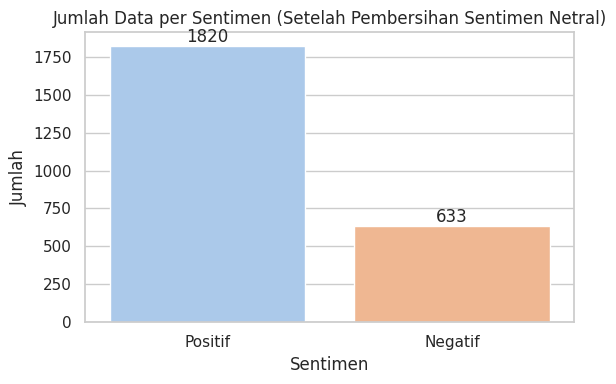

In [6]:
# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(
    x=sentimen_counts.index,
    y=sentimen_counts.values,
    hue=sentimen_counts.index,
    palette='pastel',
    legend=False
)
plt.title('Jumlah Data per Sentimen (Setelah Pembersihan Sentimen Netral)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
for i, v in enumerate(sentimen_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Visualisasi: Diagram Pie Distribusi Sentimen

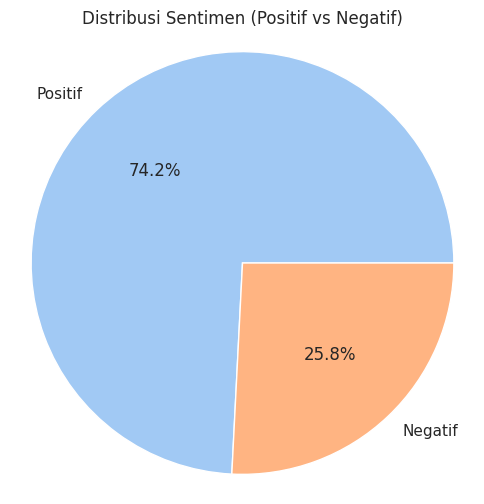

In [7]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentimen_counts.values, labels=sentimen_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Sentimen (Positif vs Negatif)')
plt.axis('equal') #  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

## Encoding Label Sentimen

In [8]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi dan transformasi
label_encoder = LabelEncoder()
df['sentimen_encoded'] = label_encoder.fit_transform(df['sentimen'])

# Tampilkan hasil label encoding
print("== Mapping Label Sentimen ke Angka ==")
print(df[['sentimen', 'sentimen_encoded']].drop_duplicates())
print("\n" + "="*50 + "\n")

# Tampilkan beberapa baris akhir
print("== Preview Akhir Dataset ==")
df.head()

== Mapping Label Sentimen ke Angka ==
  sentimen  sentimen_encoded
0  Positif                 1
2  Negatif                 0


== Preview Akhir Dataset ==


,content,score,sentimen,sentimen_encoded
0,baru mulai belajar menabung saham semoga jadi ...,5,Positif,1
1,aplikasi bagus,5,Positif,1
2,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,4,Negatif,0
3,ini termasuk apk investasi buat pemula yg bagu...,5,Positif,1
4,perbaiki terus sistem apk nya,2,Negatif,0


## Visualisasi Kata Sebelum Preprocessing




### WordCloud Kata Mentah (Sebelum Preprocessing)

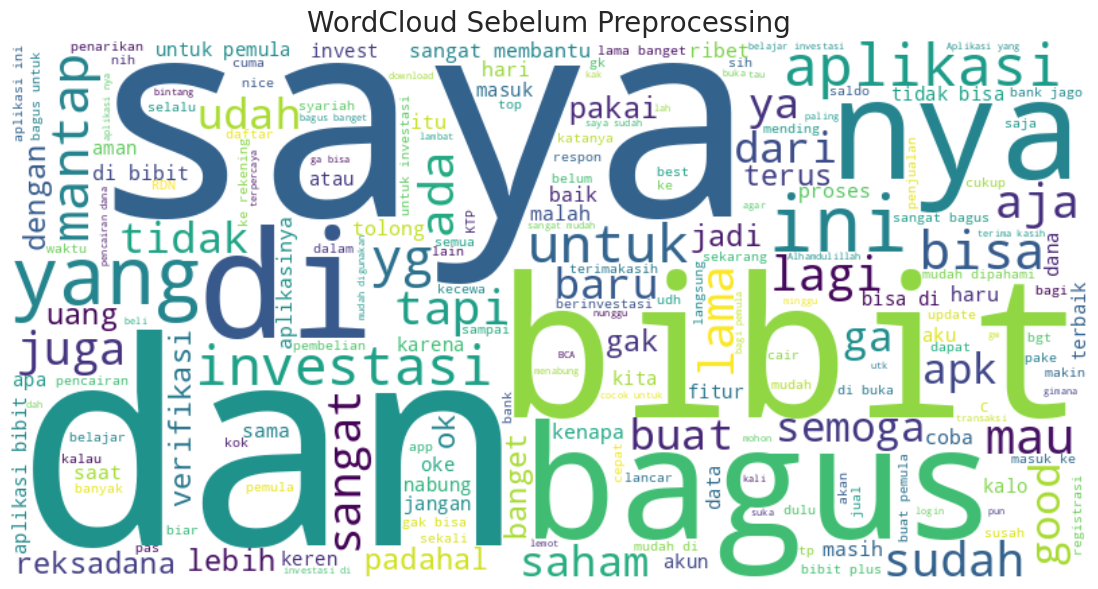

In [9]:
# Import Library
from wordcloud import WordCloud

# Gabungkan semua isi kolom content menjadi satu string
all_text = ' '.join(df['content'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sebelum Preprocessing', fontsize=20)
plt.show()

### Frekuensi 10 Kata Teratas dengan Diagram Batang (Sebelum Preprocessing)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


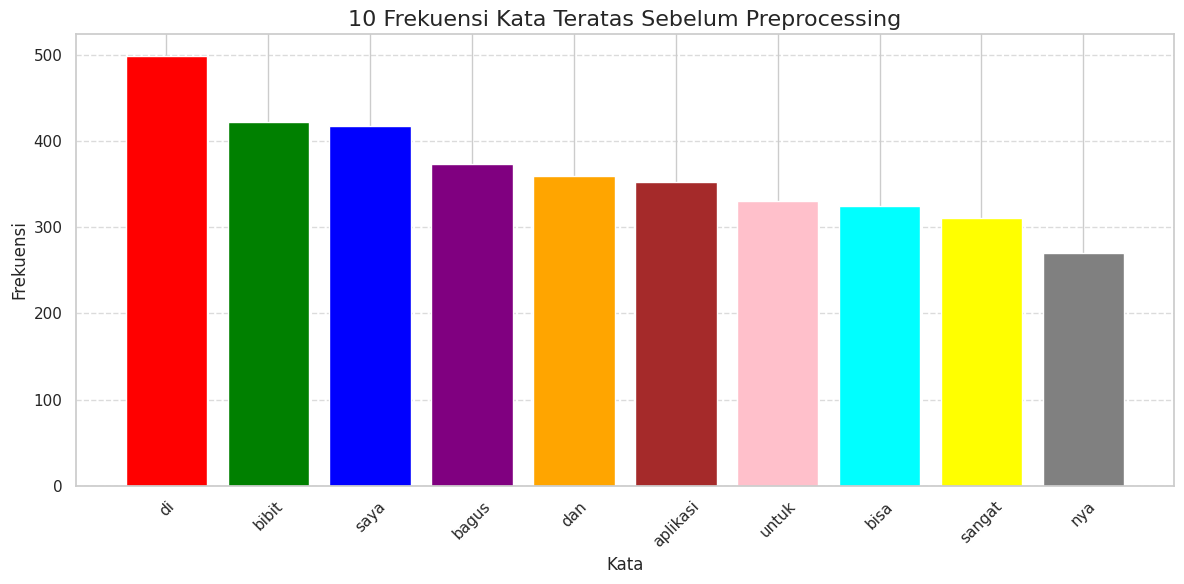

In [10]:
# Import Library
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Tokenisasi seluruh teks
tokens = word_tokenize(all_text.lower())

# Hitung frekuensi kata
word_freq = Counter(tokens)

# Ambil 10 kata paling sering muncul
top_words = word_freq.most_common(10)

# Pisahkan kata dan frekuensinya
words, freqs = zip(*top_words)

# Menentukan warna untuk setiap bar (10 warna berbeda)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'cyan', 'yellow', 'grey']

# Tampilkan diagram batang
plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color=colors)
plt.xticks(rotation=45)
plt.title('10 Frekuensi Kata Teratas Sebelum Preprocessing', fontsize=16)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Prepocessing Text

## Instalasi, Import Library dan Inisialisasi Stemmer Bahasa Indonesia

In [11]:
# Install Library
!pip install Sastrawi
!pip install emoji

# Import Library
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji

# Download data NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Buat Stemmer Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Pembersihan Teks (Cleaning Text)

In [12]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Hapus URL
    text = re.sub(r'@\w+|#\w+', '', text)        # Hapus mention & hashtag
    text = re.sub(r'\d+', '', text)              # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip()                          # Hapus spasi awal/akhir
    text = emoji.replace_emoji(text, replace='') # Hapus emoji
    text = re.sub(r'[^\x00-\x7F]+', '', text)    # HAPUS semua karakter non-ASCII
    text = re.sub(r'\s+', ' ', text)  # Ganti multiple whitespace dengan satu spasi
    return text

# Terapkan ke kolom 'content'
df['clean_content'] = df['content'].apply(clean_text)

# Tampilkan hasil pembersihan
df[['content', 'clean_content']].head(50)

,content,clean_content
0,baru mulai belajar menabung saham semoga jadi ...,baru mulai belajar menabung saham semoga jadi ...
1,aplikasi bagus,aplikasi bagus
2,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,Ga bisa di buka udah setor dana memang ashuuii
3,ini termasuk apk investasi buat pemula yg bagu...,ini termasuk apk investasi buat pemula yg bagu...
4,perbaiki terus sistem apk nya,perbaiki terus sistem apk nya
6,semoga membantu kita untuk selalu sukses berin...,semoga membantu kita untuk selalu sukses berin...
7,good,good
8,Cool apps,Cool apps
9,Sangat cocok buat pemula seperti saya,Sangat cocok buat pemula seperti saya
10,bagus,bagus


### Menghapus Baris Kosong Setelah Cleaning

In [13]:
# Hapus baris yang bersihnya jadi kosong
df = df[df['clean_content'].str.strip() != '']
df = df.reset_index(drop=True)

# Cek missing values
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Jumlah data setelah pembersihan
print("Jumlah data setelah cleaning:", len(df))

content             0
score               0
sentimen            0
sentimen_encoded    0
clean_content       0
dtype: int64


Jumlah data setelah cleaning: 2430


## Case Folding (Mengubah Teks ke Huruf Kecil)

In [14]:
# Ubah ke huruf kecil
df['clean_content'] = df['clean_content'].str.lower()

# Tampilkan hasilnya
df['clean_content'].head(50)

,clean_content
0,baru mulai belajar menabung saham semoga jadi ...
1,aplikasi bagus
2,ga bisa di buka udah setor dana memang ashuuii
3,ini termasuk apk investasi buat pemula yg bagu...
4,perbaiki terus sistem apk nya
5,semoga membantu kita untuk selalu sukses berin...
6,good
7,cool apps
8,sangat cocok buat pemula seperti saya
9,bagus


## Ekstraksi dan Penyimpanan Kata Unik

In [15]:
# Gabungkan semua teks clean_content
all_text = ' '.join(df['clean_content'].tolist())

# Ambil semua kata menggunakan regex (hanya huruf dan angka)
all_words = re.findall(r'\b\w+\b', all_text)

# Buat set unik supaya kata tidak duplikat
unique_words = set(all_words)

# Tampilkan hasil
print(f"Jumlah kata unik: {len(unique_words)}")
print(unique_words)

Jumlah kata unik: 3523
{'reksa', 'tahu', 'akrg', 'hurry', 'saranku', 'yaah', 'adanya', 'aset', 'keamanan', 'lamaaa', 'nyaman', 'blum', 'pelayananya', 'istri', 'tingkatin', 'akal', 'jadwal', 'belakangan', 'recommended', 'join', 'berhasiltolong', 'nyaa', 'pendapat', 'tinggal', 'menabung', 'mendaftar', 'karakter', 'perubahan', 'invest', 'tpi', 'kebijakanya', 'yu', 'menu', 'contohnya', 'rrj', 'respons', 'ngak', 'drastis', 'plus', 'inginkan', 'diupdate', 'penyimpanan', 'dsb', 'nerima', 'sahamnya', 'terdftar', 'samaran', 'resing', 'bngt', 'mau', 'percaya', 'maret', 'maunya', 'dibikin', 'awalnya', 'datanya', 'emng', 'decbod', 'investasimu', 'misi', 'berharap', 'dibatasi', 'u', 'list', 'kah', 'ruang', 'tadinya', 'membosankan', 'gapakal', 'baliknya', 'ditulis', 'moderat', 'apik', 'okkee', 'garcep', 'caircair', 'memulai', 'diselesaikan', 'selagi', 'riba', 'ditunggu', 'yukk', 'hadehh', 'pengoperasian', 'sunariopasti', 'will', 'minus', 'formulir', 'scam', 'cepatt', 'condong', 'ditindak', 'prinsip'

In [16]:
# Simpan ke TXT
with open('kata_unik.txt', 'w', encoding='utf-8') as f:
    for word in sorted(unique_words):  # Urutkan biar rapi
        f.write(word + '\n')

## Normalisasi Teks

In [17]:
# Import json untuk membaca file slangword
import json

# Membaca file slangwords.txt
with open('normalisasi.txt', 'r', encoding='utf-8') as file:
    slang_dict = json.load(file)

# Contoh: tampilkan beberapa slangword untuk pengecekan
print("Isi normalisasi:")
print({k: slang_dict[k] for k in list(slang_dict)[:10]})

Isi normalisasi:
{'a': '', 'aamiin': 'amin', 'abadi': 'abadi', 'abal': 'abal', 'abis': 'habis', 'abiz': 'habis', 'about': 'tentang', 'acc': 'akun', 'account': 'akun', 'actionya': 'aksi'}


In [18]:
# Fungsi untuk normalisasi slangword
def normalize_text(text, slang_dict):
    words = re.findall(r'\b\w+\b', text.lower())  # ambil kata tanpa tanda baca
    normalized_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi ke clean_content
df['normalized_content'] = df['clean_content'].apply(lambda x: normalize_text(x, slang_dict))

# Daftar kata yang harus tetap utuh
exclude_words = [
    'masalah','penyakit', 'banyak', 'tanya', 'hanya', 'punya', 'nyata', 'lenyap', 'nyaran',
    'nyakit', 'nyair', 'nyaman', 'nyambung', 'nyaji', 'nyandang', 'sinyal',
    'salah', 'lelah', 'istilah', 'jumlah', 'kalah', 'setelah', 'sebelah',
    'sekolah', 'seolah', 'silahkan', 'telah', 'berkah', 'langkah', 'nikah',
    'nafkah', 'sedekah', 'nampung', 'pundi'
]

def remove_particles(text):
    # Pisahkan kalimat menjadi kata-kata
    words = re.findall(r'\b\w+\b', text)

    # Hanya hapus partikel jika kata bukan dalam daftar exclude_words
    result = []
    for word in words:
        if word.lower() in exclude_words:
            result.append(word)  # Jangan diubah
        else:
            # Hapus partikel seperti 'nya', 'lah', 'kah', 'pun', 'ku', 'mu' pada kata lainnya
            word = re.sub(r'(nya|lah|kah|pun|ku|mu)\b', '', word)
            result.append(word)

    return ' '.join(result)

# Terapkan penghapusan partikel
df['normalized_content'] = df['normalized_content'].apply(remove_particles)

# Tampilkan hasil normalisasi
df[['clean_content', 'normalized_content']].head(200)

,clean_content,normalized_content
0,baru mulai belajar menabung saham semoga jadi ...,baru mulai belajar menabung saham semoga jadi ...
1,aplikasi bagus,aplikasi bagus
2,ga bisa di buka udah setor dana memang ashuuii,tidak bisa di buka sudah setor dana memang
3,ini termasuk apk investasi buat pemula yg bagu...,ini termasuk aplikasi investasi buat pemula ya...
4,perbaiki terus sistem apk nya,perbaiki terus sistem aplikasi
...,...,...
195,investasi di bibit sangat bagus dan juga mudah...,investasi di bibit sangat bagus dan juga mudah...
196,aplikasi yg sangat membantu dalam keuangan,aplikasi yang sangat membantu dalam keuangan
197,simple but oke,simple tetapi oke
198,baguss sangat mudah di mengerti,bagus sangat mudah di mengerti


## Tokenizing/Tokenisasi (Memecah Kalimat Menjadi Kata-Kata)

In [19]:
# Tokenisasi dulu dari hasil normalisasi
df['tokenized_content'] = df['normalized_content'].apply(word_tokenize)

# Tampilkan hasil tokenizing
df[['normalized_content', 'tokenized_content']].head(20)

,normalized_content,tokenized_content
0,baru mulai belajar menabung saham semoga jadi ...,"[baru, mulai, belajar, menabung, saham, semoga..."
1,aplikasi bagus,"[aplikasi, bagus]"
2,tidak bisa di buka sudah setor dana memang,"[tidak, bisa, di, buka, sudah, setor, dana, me..."
3,ini termasuk aplikasi investasi buat pemula ya...,"[ini, termasuk, aplikasi, investasi, buat, pem..."
4,perbaiki terus sistem aplikasi,"[perbaiki, terus, sistem, aplikasi]"
5,semoga membantu kita untuk selalu sukses berin...,"[semoga, membantu, kita, untuk, selalu, sukses..."
6,bagus,[bagus]
7,keren aplikasi,"[keren, aplikasi]"
8,sangat cocok buat pemula seperti saya,"[sangat, cocok, buat, pemula, seperti, saya]"
9,bagus,[bagus]


## Stopword Removal (Menghapus Kata-Kata Umum)

In [20]:
# Ambil daftar stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Terapkan
df['stopword_removed'] = df['tokenized_content'].apply(remove_stopwords)

# Tampilkan hasil stopword removal
df[['tokenized_content', 'stopword_removed']].head(20)

,tokenized_content,stopword_removed
0,"[baru, mulai, belajar, menabung, saham, semoga...","[belajar, menabung, saham, semoga, pasif, pend..."
1,"[aplikasi, bagus]","[aplikasi, bagus]"
2,"[tidak, bisa, di, buka, sudah, setor, dana, me...","[buka, setor, dana]"
3,"[ini, termasuk, aplikasi, investasi, buat, pem...","[aplikasi, investasi, pemula, bagus, mantap, p..."
4,"[perbaiki, terus, sistem, aplikasi]","[perbaiki, sistem, aplikasi]"
5,"[semoga, membantu, kita, untuk, selalu, sukses...","[semoga, membantu, sukses, berinvestasi]"
6,[bagus],[bagus]
7,"[keren, aplikasi]","[keren, aplikasi]"
8,"[sangat, cocok, buat, pemula, seperti, saya]","[cocok, pemula]"
9,[bagus],[bagus]


## Stemming (Mengubah Kata ke Bentuk Dasar)

In [21]:
# Fungsi untuk stemming
def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

# Terapkan
df['stemmed_content'] = df['stopword_removed'].apply(stem_words)

# Tampilkan hasil stemming
df[['stopword_removed', 'stemmed_content']].head(20)

,stopword_removed,stemmed_content
0,"[belajar, menabung, saham, semoga, pasif, pend...","[ajar, tabung, saham, moga, pasif, dapat]"
1,"[aplikasi, bagus]","[aplikasi, bagus]"
2,"[buka, setor, dana]","[buka, setor, dana]"
3,"[aplikasi, investasi, pemula, bagus, mantap, p...","[aplikasi, investasi, mula, bagus, mantap, pokok]"
4,"[perbaiki, sistem, aplikasi]","[baik, sistem, aplikasi]"
5,"[semoga, membantu, sukses, berinvestasi]","[moga, bantu, sukses, investasi]"
6,[bagus],[bagus]
7,"[keren, aplikasi]","[keren, aplikasi]"
8,"[cocok, pemula]","[cocok, mula]"
9,[bagus],[bagus]


##  Cek Final Data, Validasi dan Hapus Baris Kosong

In [22]:
# Hapus baris yang stemmed_content kosong (list kosong)
df = df[df['stemmed_content'].apply(lambda x: len(x) > 0)].reset_index(drop=True)

# Cek apakah ada missing values
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Jumlah data setelah stemming
print("Jumlah data setelah stemming:", len(df))
print("\n" + "="*50 + "\n")

# Tampilkan data akhir
df.head(50)

content               0
score                 0
sentimen              0
sentimen_encoded      0
clean_content         0
normalized_content    0
tokenized_content     0
stopword_removed      0
stemmed_content       0
dtype: int64


Jumlah data setelah stemming: 2328




,content,score,sentimen,sentimen_encoded,clean_content,normalized_content,tokenized_content,stopword_removed,stemmed_content
0,baru mulai belajar menabung saham semoga jadi ...,5,Positif,1,baru mulai belajar menabung saham semoga jadi ...,baru mulai belajar menabung saham semoga jadi ...,"[baru, mulai, belajar, menabung, saham, semoga...","[belajar, menabung, saham, semoga, pasif, pend...","[ajar, tabung, saham, moga, pasif, dapat]"
1,aplikasi bagus,5,Positif,1,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]","[aplikasi, bagus]"
2,Ga bisa di buka udah setor dana memang ashuuii🤣🤣🤣,4,Negatif,0,ga bisa di buka udah setor dana memang ashuuii,tidak bisa di buka sudah setor dana memang,"[tidak, bisa, di, buka, sudah, setor, dana, me...","[buka, setor, dana]","[buka, setor, dana]"
3,ini termasuk apk investasi buat pemula yg bagu...,5,Positif,1,ini termasuk apk investasi buat pemula yg bagu...,ini termasuk aplikasi investasi buat pemula ya...,"[ini, termasuk, aplikasi, investasi, buat, pem...","[aplikasi, investasi, pemula, bagus, mantap, p...","[aplikasi, investasi, mula, bagus, mantap, pokok]"
4,perbaiki terus sistem apk nya,2,Negatif,0,perbaiki terus sistem apk nya,perbaiki terus sistem aplikasi,"[perbaiki, terus, sistem, aplikasi]","[perbaiki, sistem, aplikasi]","[baik, sistem, aplikasi]"
5,semoga membantu kita untuk selalu sukses berin...,5,Positif,1,semoga membantu kita untuk selalu sukses berin...,semoga membantu kita untuk selalu sukses berin...,"[semoga, membantu, kita, untuk, selalu, sukses...","[semoga, membantu, sukses, berinvestasi]","[moga, bantu, sukses, investasi]"
6,good,5,Positif,1,good,bagus,[bagus],[bagus],[bagus]
7,Cool apps,5,Positif,1,cool apps,keren aplikasi,"[keren, aplikasi]","[keren, aplikasi]","[keren, aplikasi]"
8,Sangat cocok buat pemula seperti saya,5,Positif,1,sangat cocok buat pemula seperti saya,sangat cocok buat pemula seperti saya,"[sangat, cocok, buat, pemula, seperti, saya]","[cocok, pemula]","[cocok, mula]"
9,bagus,4,Positif,1,bagus,bagus,[bagus],[bagus],[bagus]


## Visualisasi Sesudah Preprocessing

### WordCloud Kata Sesudah Preprocessing

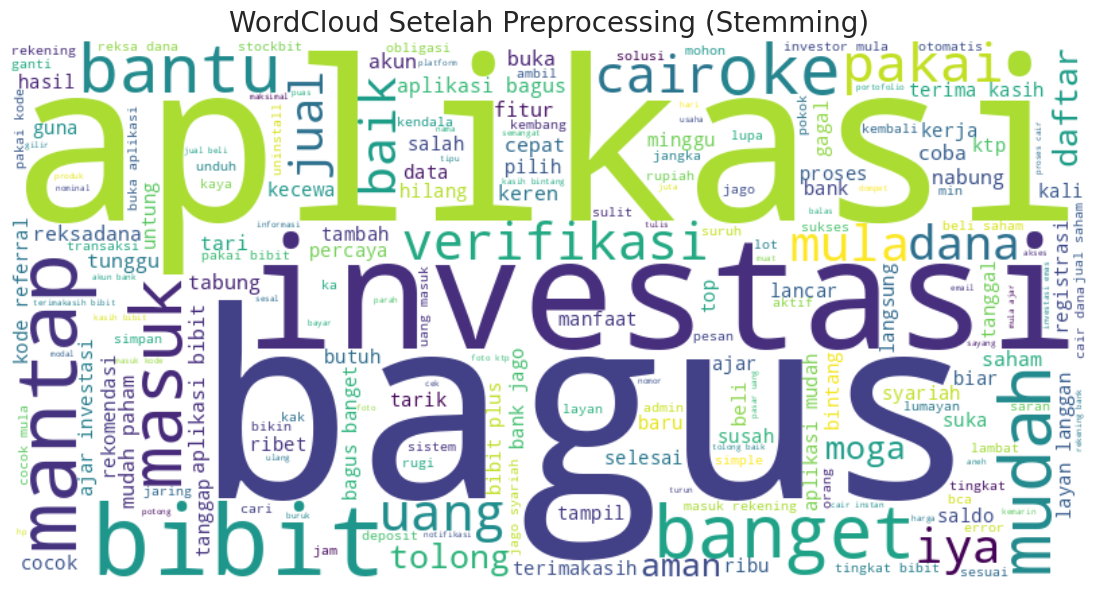

In [23]:
# Gabungkan semua kata hasil stemming jadi satu string
all_stemmed_words = ' '.join([' '.join(words) for words in df['stemmed_content']])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_words)

# Tampilkan WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Setelah Preprocessing (Stemming)', fontsize=20)
plt.show()

## Frekuensi 10 Kata Teratas dengan Diagram Batang (Sesudah Preprocessing)

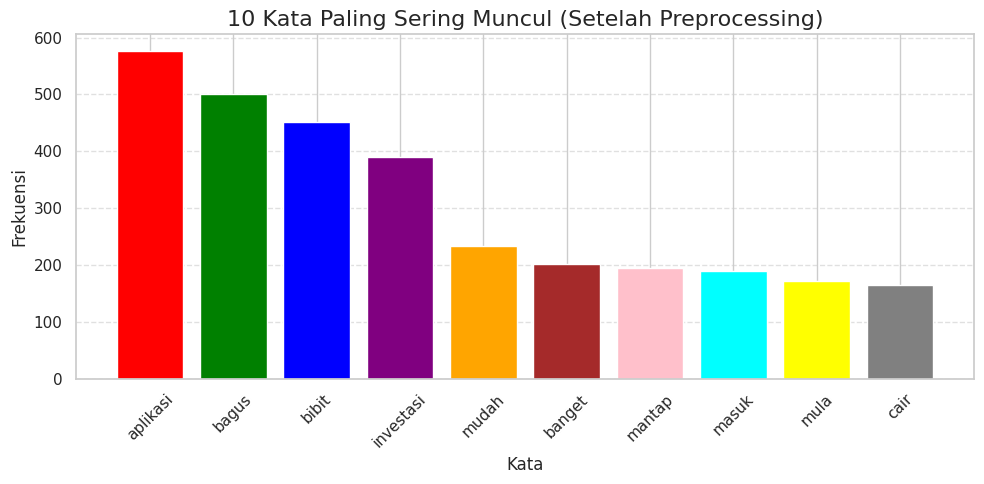

In [24]:
# Hitung frekuensi kata setelah stemming
stemmed_word_freq = Counter(all_stemmed_words.split())

# Ambil 10 kata paling sering muncul
top_stemmed_words = stemmed_word_freq.most_common(10)

# Pisahkan kata dan frekuensinya
words, freqs = zip(*top_stemmed_words)

# Menentukan warna untuk setiap bar (10 warna berbeda)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'cyan', 'yellow', 'grey']

# Tampilkan diagram batang
plt.figure(figsize=(10, 5))
plt.bar(words, freqs, color=colors)
plt.xticks(rotation=45)
plt.title('10 Kata Paling Sering Muncul (Setelah Preprocessing)', fontsize=16)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5. Pembobotan Kata ( TF-IDF )

In [25]:
# Import library TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

## Gabungkan Kata Hasil Preprocessing Menjadi Kalimat

In [26]:
# Gabungkan list kata hasil stemming menjadi kalimat
df['processed_text'] = df['stemmed_content'].apply(lambda x: ' '.join(x))

# Menambahkan ID dokumen jika belum ada
df['ID_Dokumen'] = df.index + 1

# Ambil ID dokumen dan teks setelah preprocessing
dokumen_teks_df = df[['ID_Dokumen', 'processed_text']]

# Tampilkan ID Dokumen dan Teks Setelah Preprocessing
print("== Hasil Dokumen Teks ==")
dokumen_teks_df.head(20)

== Hasil Dokumen Teks ==


,ID_Dokumen,processed_text
0,1,ajar tabung saham moga pasif dapat
1,2,aplikasi bagus
2,3,buka setor dana
3,4,aplikasi investasi mula bagus mantap pokok
4,5,baik sistem aplikasi
5,6,moga bantu sukses investasi
6,7,bagus
7,8,keren aplikasi
8,9,cocok mula
9,10,bagus


## Inisialisasi, Pembobotan Dokumen dengan TF-IDF, Ambil Kata Unik dan Konversi Matriks TF-IDF ke DataFrame

In [27]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks ke bentuk matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Ambil semua kata unik yang digunakan sebagai fitur
feature_names = tfidf_vectorizer.get_feature_names_out()

# Ubah matriks menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom ID dokumen agar mudah dilacak
tfidf_df.insert(0, 'ID_Dokumen', df.index + 1)

# Tampilkan 5 baris pertama
print("== Hasil TF-IDF ==")
tfidf_df.head()

== Hasil TF-IDF ==


,ID_Dokumen,abadi,abal,admin,administrasi,aduh,agresif,ahli,ain,ajaib,...,wajar,wajib,walet,warna,wenang,whatsapp,wifi,xiaomi,youtube,zaman
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Melihat Bobot TF-IDF dari Beberapa Dokumen

In [28]:
# Tentukan jumlah dokumen yang ingin dianalisis (misal 5 dokumen pertama)
num_docs = 5
top_n = 10  # jumlah kata tertinggi per dokumen

# List untuk menampung hasil
top_words_per_doc = []

# Looping setiap dokumen
for idx in range(num_docs):
    doc_id = df.index[idx] + 1
    doc_tfidf = pd.DataFrame(tfidf_df.iloc[idx, 1:]).reset_index()
    doc_tfidf.columns = ['Kata', 'TF-IDF']
    doc_tfidf = doc_tfidf.sort_values(by='TF-IDF', ascending=False).head(top_n)
    doc_tfidf['ID_Dokumen'] = doc_id
    top_words_per_doc.append(doc_tfidf)

# Gabungkan semua hasil ke satu DataFrame
top_words_df = pd.concat(top_words_per_doc, ignore_index=True)

# Tampilkan
print("== Top Kata TF-IDF untuk Beberapa Dokumen ==")
print(top_words_df)

== Top Kata TF-IDF untuk Beberapa Dokumen ==
         Kata    TF-IDF  ID_Dokumen
0       pasif  0.568322           1
1       dapat  0.446917           1
2      tabung  0.371972           1
3        ajar  0.348749           1
4        moga  0.330796           1
5       saham  0.328421           1
6    permanen  0.000000           1
7       perlu  0.000000           1
8    perintah  0.000000           1
9     perinci  0.000000           1
10      bagus  0.713842           2
11   aplikasi  0.700307           2
12  pertamina  0.000000           2
13   permanen  0.000000           2
14      perlu  0.000000           2
15   perintah  0.000000           2
16    perinci  0.000000           2
17    periksa  0.000000           2
18    perihal  0.000000           2
19    perhati  0.000000           2
20      setor  0.797474           3
21       buka  0.446660           3
22       dana  0.405623           3
23   pengaruh  0.000000           3
24      perlu  0.000000           3
25   perintah  0.00

In [29]:
# Simpan hasil TF-IDF ke file
tfidf_df.to_csv('tfidf_result.csv', index=False)

## Visualisasi Kata Teratas Berdasarkan TF-IDF dengan Diagram Batang

== 10 Kata dengan Nilai TF-IDF Tertinggi ==
               TF-IDF
bagus      299.324935
mantap     154.221836
aplikasi   138.194888
investasi  106.521681
oke        101.036515
bibit       93.290877
mudah       88.069946
mula        68.632995
banget      61.674861
bantu       57.768204




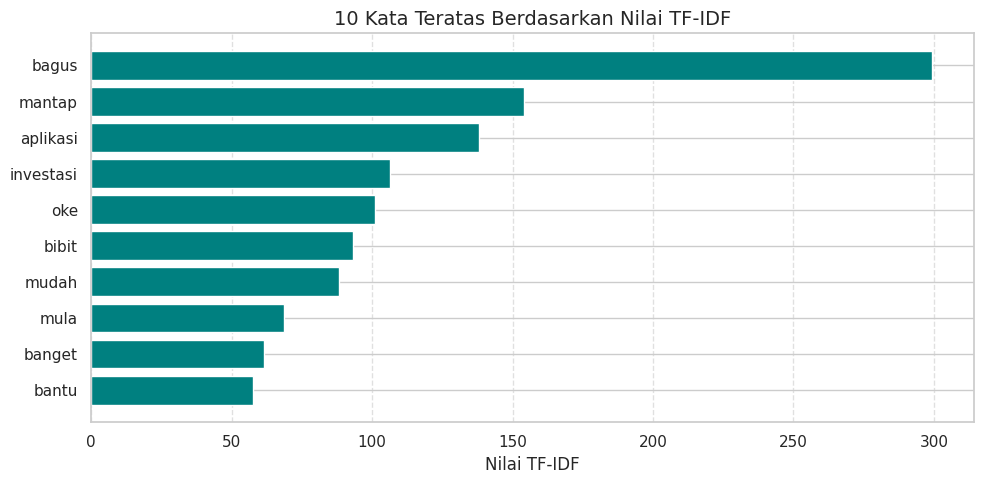

In [30]:
# Ambil skor TF-IDF total setiap kata di seluruh dokumen
tfidf_sum = tfidf_df.drop(columns='ID_Dokumen').sum(axis=0)

# Ubah jadi DataFrame dan urutkan berdasarkan nilai tertinggi
sorted_tfidf = pd.DataFrame(tfidf_sum, columns=['TF-IDF'])
sorted_tfidf = sorted_tfidf.sort_values(by='TF-IDF', ascending=False)

# Ambil 10 kata dengan nilai TF-IDF tertinggi
top_10_words = sorted_tfidf.head(10)

# Tampilkan daftar kata dan bobotnya
print("== 10 Kata dengan Nilai TF-IDF Tertinggi ==")
print(top_10_words)
print("\n")

# Buat Bar Chart Horizontal
plt.figure(figsize=(10, 5))
plt.barh(top_10_words.index, top_10_words['TF-IDF'], color='teal')
plt.xlabel('Nilai TF-IDF', fontsize=12)
plt.title('10 Kata Teratas Berdasarkan Nilai TF-IDF', fontsize=14)
plt.gca().invert_yaxis()  # Kata dengan nilai tertinggi di atas
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. Pembagian Data (Training dan Testing)

In [31]:
# Import Library yang Diperlukan untuk Pembagian Data
from sklearn.model_selection import train_test_split

# Persiapan Data (TF-IDF Matrix dan Label)
X = tfidf_matrix  # Fitur (TF-IDF matrix hasil sebelumnya)
y = df['sentimen_encoded']  # Label (sentimen)

# Pembagian Data (Training dan Testing) dengan berbagai rasio
ratios = [0.6, 0.7, 0.8, 0.9]

# Pembagian data sesuai rasio yang ditentukan
splits = {}

for ratio in ratios:
    test_size = round(1 - ratio, 2)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Simpan ke dictionary
    splits[ratio] = (X_train, X_test, y_train, y_test)

    # Menampilkan informasi pembagian data
    train_percent = int(ratio * 100)
    test_percent = int(test_size * 100)
    print(f"Pembagian Data: {train_percent}:{test_percent}")
    print(f"Jumlah Data Latih: {X_train.shape[0]} | Jumlah Data Uji: {X_test.shape[0]}")
    print("=" * 50)

Pembagian Data: 60:40
Jumlah Data Latih: 1396 | Jumlah Data Uji: 932
Pembagian Data: 70:30
Jumlah Data Latih: 1629 | Jumlah Data Uji: 699
Pembagian Data: 80:20
Jumlah Data Latih: 1862 | Jumlah Data Uji: 466
Pembagian Data: 90:10
Jumlah Data Latih: 2095 | Jumlah Data Uji: 233


# 7. Pemodelan Klasifikasi Algoritma Naive Bayes dan KNN

## Algoritma Naive Bayes

In [32]:
# Import Library
from sklearn.naive_bayes import MultinomialNB

# Inisialisasi Model Naive Bayes
nb_model = MultinomialNB()

# Melatih dan Mengevaluasi Model Naive Bayes pada Setiap Rasio
for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    train_percent = int(round(ratio * 100))
    test_percent = int(round((1 - ratio) * 100))

    print(f"\nPembagian Data: {train_percent}% Training | {test_percent}% Testing")

    # Latih model
    nb_model.fit(X_train, y_train)
    print(f"Model Multinomial Naive Bayes telah dilatih dengan rasio {train_percent}:{test_percent}")

    print("-" * 60)


Pembagian Data: 60% Training | 40% Testing
Model Multinomial Naive Bayes telah dilatih dengan rasio 60:40
------------------------------------------------------------

Pembagian Data: 70% Training | 30% Testing
Model Multinomial Naive Bayes telah dilatih dengan rasio 70:30
------------------------------------------------------------

Pembagian Data: 80% Training | 20% Testing
Model Multinomial Naive Bayes telah dilatih dengan rasio 80:20
------------------------------------------------------------

Pembagian Data: 90% Training | 10% Testing
Model Multinomial Naive Bayes telah dilatih dengan rasio 90:10
------------------------------------------------------------


## Algoritma KNN

In [33]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Melatih dan Mengevaluasi Model KNN pada Setiap Rasio
for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    train_percent = int(round(ratio * 100))
    test_percent = int(round((1 - ratio) * 100))

    print(f"\nPembagian Data: {train_percent}% Training | {test_percent}% Testing")

    # Latih model
    knn_model.fit(X_train, y_train)
    print(f"Model KNN telah dilatih dengan rasio {train_percent}:{test_percent}")

    print("-" * 60)


Pembagian Data: 60% Training | 40% Testing
Model KNN telah dilatih dengan rasio 60:40
------------------------------------------------------------

Pembagian Data: 70% Training | 30% Testing
Model KNN telah dilatih dengan rasio 70:30
------------------------------------------------------------

Pembagian Data: 80% Training | 20% Testing
Model KNN telah dilatih dengan rasio 80:20
------------------------------------------------------------

Pembagian Data: 90% Training | 10% Testing
Model KNN telah dilatih dengan rasio 90:10
------------------------------------------------------------


# 8. Evaluasi Peforma Model

## Evaluasi Performa Model - Naive Bayes

### Rasio 60:40

Classification Report Naive Bayes (60:40):
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       252
           1       0.89      0.96      0.92       680

    accuracy                           0.89       932
   macro avg       0.88      0.82      0.84       932
weighted avg       0.88      0.89      0.88       932



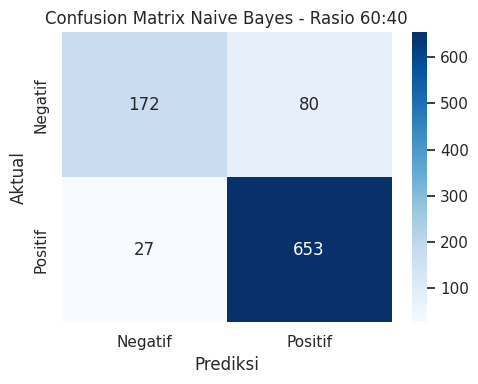

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Data 60:40
X_train, X_test, y_train, y_test = splits[0.6]

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Classification Report
print("Classification Report Naive Bayes (60:40):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Naive Bayes - Rasio 60:40")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 70:30

Classification Report Naive Bayes (70:30):
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       189
           1       0.90      0.96      0.93       510

    accuracy                           0.89       699
   macro avg       0.88      0.84      0.86       699
weighted avg       0.89      0.89      0.89       699



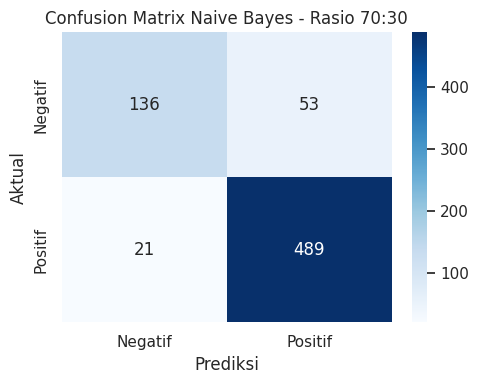

In [35]:
# Data 70:30
X_train, X_test, y_train, y_test = splits[0.7]

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Classification Report
print("Classification Report Naive Bayes (70:30):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Naive Bayes - Rasio 70:30")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 80:20

Classification Report Naive Bayes (80:20):
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       126
           1       0.90      0.95      0.93       340

    accuracy                           0.89       466
   macro avg       0.87      0.84      0.85       466
weighted avg       0.89      0.89      0.89       466



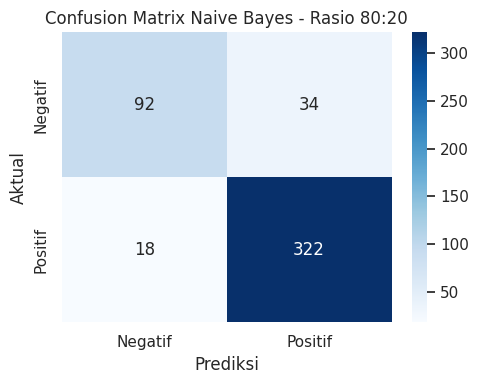

In [36]:
# Data 80:20
X_train, X_test, y_train, y_test = splits[0.8]

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Classification Report
print("Classification Report Naive Bayes (80:20):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Naive Bayes - Rasio 80:20")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 90:10

Classification Report Naive Bayes (90:10):
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        63
           1       0.91      0.95      0.93       170

    accuracy                           0.90       233
   macro avg       0.88      0.85      0.87       233
weighted avg       0.90      0.90      0.90       233



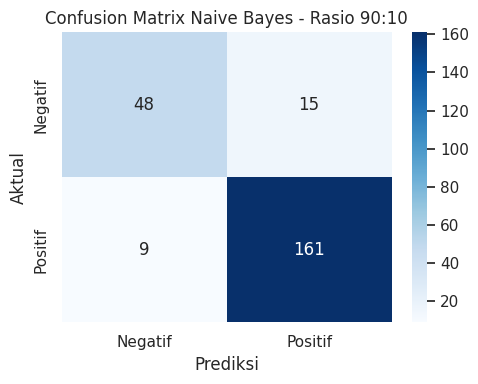

In [37]:
# Data 90:10
X_train, X_test, y_train, y_test = splits[0.9]

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Classification Report
print("Classification Report Naive Bayes (90:10):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Naive Bayes - Rasio 90:10")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

## Evaluasi Performa Model - KNN

### Rasio 60:40

Classification Report KNN (60:40):
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       252
           1       0.92      0.93      0.92       680

    accuracy                           0.89       932
   macro avg       0.86      0.86      0.86       932
weighted avg       0.89      0.89      0.89       932



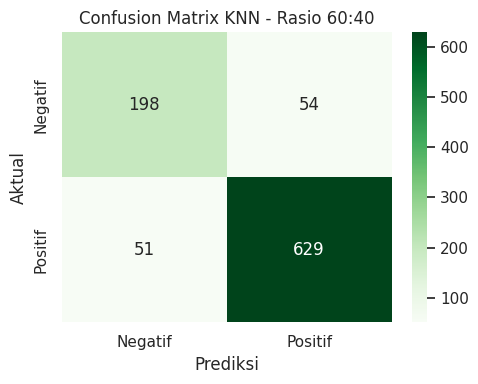

In [38]:
# Data 60:40
X_train, X_test, y_train, y_test = splits[0.6]

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classification Report
print("Classification Report KNN (60:40):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix KNN - Rasio 60:40")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 70:30

Classification Report KNN (70:30):
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       189
           1       0.91      0.92      0.91       510

    accuracy                           0.87       699
   macro avg       0.84      0.83      0.84       699
weighted avg       0.87      0.87      0.87       699



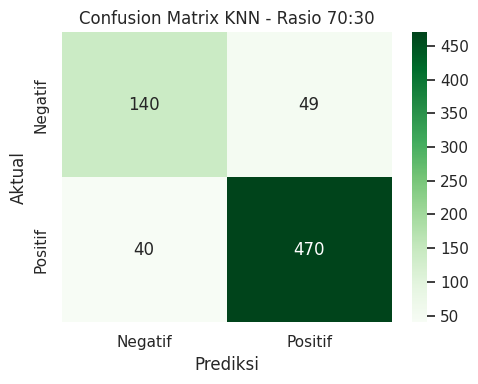

In [39]:
# Data 70:30
X_train, X_test, y_train, y_test = splits[0.7]

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classification Report
print("Classification Report KNN (70:30):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix KNN - Rasio 70:30")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 80:20

Classification Report KNN (80:20):
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       126
           1       0.92      0.92      0.92       340

    accuracy                           0.88       466
   macro avg       0.85      0.85      0.85       466
weighted avg       0.88      0.88      0.88       466



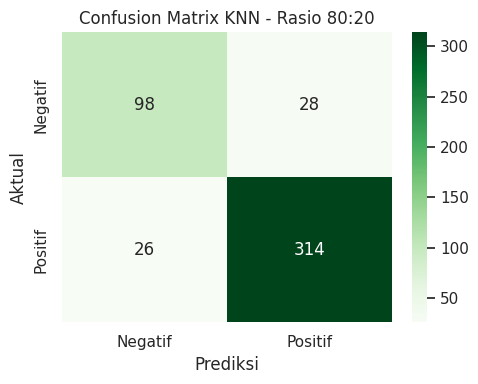

In [40]:
# Data 80:20
X_train, X_test, y_train, y_test = splits[0.8]

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classification Report
print("Classification Report KNN (80:20):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix KNN - Rasio 80:20")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

### Rasio 90:10

Classification Report KNN (90:10):
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        63
           1       0.92      0.92      0.92       170

    accuracy                           0.89       233
   macro avg       0.86      0.86      0.86       233
weighted avg       0.89      0.89      0.89       233



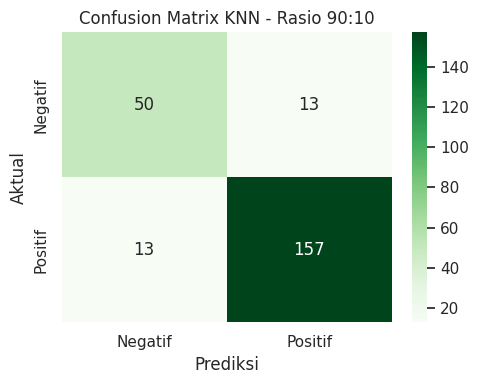

In [41]:
# Data 90:10
X_train, X_test, y_train, y_test = splits[0.9]

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Classification Report
print("Classification Report KNN (90:10):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix KNN - Rasio 90:10")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# 9. Hasil Evaluasi Peforma Model

## Tabel Hasil Evaluasi Naive Bayes (Akurasi, Presisi, Recall, F1-Score)

In [62]:
# DataFrame untuk hasil evaluasi model Naive Bayes
nb_results = []

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    nb_results.append({
        'Rasio (Latih:Uji)': f"{int(round(ratio * 100))}:{int(round((1 - ratio) * 100))}",
        'Akurasi (%)': f"{accuracy_score(y_test, y_pred_nb) * 100:.2f}%",
        'Presisi (%)': f"{precision_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%",
        'Recall (%)': f"{recall_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%",
        'F1-Score (%)': f"{f1_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%"
    })

nb_df = pd.DataFrame(nb_results)
print(" Tabel Hasil Evaluasi Naive Bayes:\n")
nb_df

 Tabel Hasil Evaluasi Naive Bayes:



,Rasio (Latih:Uji),Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,60:40,88.52%,88.37%,88.52%,88.06%
1,70:30,89.41%,89.25%,89.41%,89.08%
2,80:20,88.84%,88.61%,88.84%,88.59%
3,90:10,89.70%,89.51%,89.70%,89.53%


## Tabel Hasil Evaluasi K-Nearest Neighbors (KNN) (Akurasi, Presisi, Recall, F1-Score)

In [43]:
# DataFrame untuk hasil evaluasi model KNN
knn_results = []

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    knn_results.append({
        'Rasio (Latih:Uji)': f"{int(round(ratio * 100))}:{int(round((1 - ratio) * 100))}",
        'Akurasi (%)': f"{accuracy_score(y_test, y_pred_knn) * 100:.2f}%",
        'Presisi (%)': f"{precision_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%",
        'Recall (%)': f"{recall_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%",
        'F1-Score (%)': f"{f1_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%"
    })

knn_df = pd.DataFrame(knn_results)
print(" Tabel Hasil Evaluasi K-Nearest Neighbors (KNN):\n")
knn_df

 Tabel Hasil Evaluasi K-Nearest Neighbors (KNN):



,Rasio (Latih:Uji),Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,60:40,88.73%,88.69%,88.73%,88.71%
1,70:30,87.27%,87.10%,87.27%,87.17%
2,80:20,88.41%,88.36%,88.41%,88.38%
3,90:10,88.84%,88.84%,88.84%,88.84%


## Perbandingan Hasil Evaluasi Naive Bayes dan KNN

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Loop tiap rasio dan buat tabel per rasio
for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    train_percent = int(round(ratio * 100))
    test_percent = int(round((1 - ratio) * 100))
    print(f"\nPerbandingan Performa Model untuk Rasio {train_percent}:{test_percent}\n")

    result_rows = []

    # Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    result_rows.append({
        'Algoritma': 'Naive Bayes',
        'Akurasi (%)': f"{accuracy_score(y_test, y_pred_nb) * 100:.2f}%",
        'Presisi (%)': f"{precision_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%",
        'Recall (%)': f"{recall_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%",
        'F1-Score (%)': f"{f1_score(y_test, y_pred_nb, average='weighted') * 100:.2f}%"
    })

    # KNN
    knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    result_rows.append({
        'Algoritma': 'KNN',
        'Akurasi (%)': f"{accuracy_score(y_test, y_pred_knn) * 100:.2f}%",
        'Presisi (%)': f"{precision_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%",
        'Recall (%)': f"{recall_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%",
        'F1-Score (%)': f"{f1_score(y_test, y_pred_knn, average='weighted') * 100:.2f}%"
    })

    # Buat DataFrame
    ratio_df = pd.DataFrame(result_rows)
    display(ratio_df)


Perbandingan Performa Model untuk Rasio 60:40



,Algoritma,Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,Naive Bayes,88.52%,88.37%,88.52%,88.06%
1,KNN,88.73%,88.69%,88.73%,88.71%



Perbandingan Performa Model untuk Rasio 70:30



,Algoritma,Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,Naive Bayes,89.41%,89.25%,89.41%,89.08%
1,KNN,87.27%,87.10%,87.27%,87.17%



Perbandingan Performa Model untuk Rasio 80:20



,Algoritma,Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,Naive Bayes,88.84%,88.61%,88.84%,88.59%
1,KNN,88.41%,88.36%,88.41%,88.38%



Perbandingan Performa Model untuk Rasio 90:10



,Algoritma,Akurasi (%),Presisi (%),Recall (%),F1-Score (%)
0,Naive Bayes,89.70%,89.51%,89.70%,89.53%
1,KNN,88.84%,88.84%,88.84%,88.84%


# 10. Visualisasi Hasil Peforma Model Naive Bayes dan KNN

## Menyimpan Hasil Prediksi Model dan Konversi Nilai Persentase ke Float

In [45]:
import numpy as np

# Simpan Hasil Prediksi Model
nb_preds = {}
knn_preds = {}

for ratio, (X_train, X_test, y_train, y_test) in splits.items():
    nb_model = MultinomialNB().fit(X_train, y_train)
    knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

    nb_preds[ratio] = (y_test, nb_model.predict(X_test))
    knn_preds[ratio] = (y_test, knn_model.predict(X_test))

# Konversi dataframe dari string ke float untuk visualisasi
def convert_to_float(df):
    df_float = df.copy()
    for col in ['Akurasi (%)', 'Presisi (%)', 'Recall (%)', 'F1-Score (%)']:
        df_float[col] = df_float[col].str.replace('%', '').astype(float)
    return df_float

# Konversi dataframe Naive Bayes dan KNN
nb_df_float = convert_to_float(nb_df)
knn_df_float = convert_to_float(knn_df)

## Visualisasi Perbandingan Akurasi Model (Line Chart)

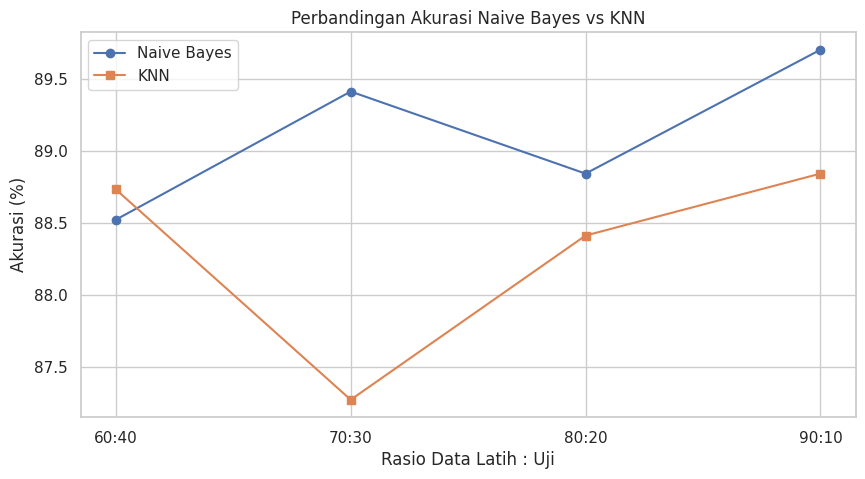

In [46]:
# Ekstrak akurasi dari nb_results dan knn_results
ratios = [res['Rasio (Latih:Uji)'] for res in nb_results]
nb_acc = [float(res['Akurasi (%)'].replace('%', '')) for res in nb_results]
knn_acc = [float(res['Akurasi (%)'].replace('%', '')) for res in knn_results]

# Visualisasikan perbandingan akurasi antara Naive Bayes dan KNN menggunakan line chart
plt.figure(figsize=(10, 5))
plt.plot(ratios, nb_acc, marker='o', label='Naive Bayes')
plt.plot(ratios, knn_acc, marker='s', label='KNN')
plt.title('Perbandingan Akurasi Naive Bayes vs KNN')
plt.xlabel('Rasio Data Latih : Uji')
plt.ylabel('Akurasi (%)')
plt.legend()
plt.grid(True)
plt.show()

## Visualisasi Perbandingan Presisi, Recall, dan F1-Score (Bar Chart)

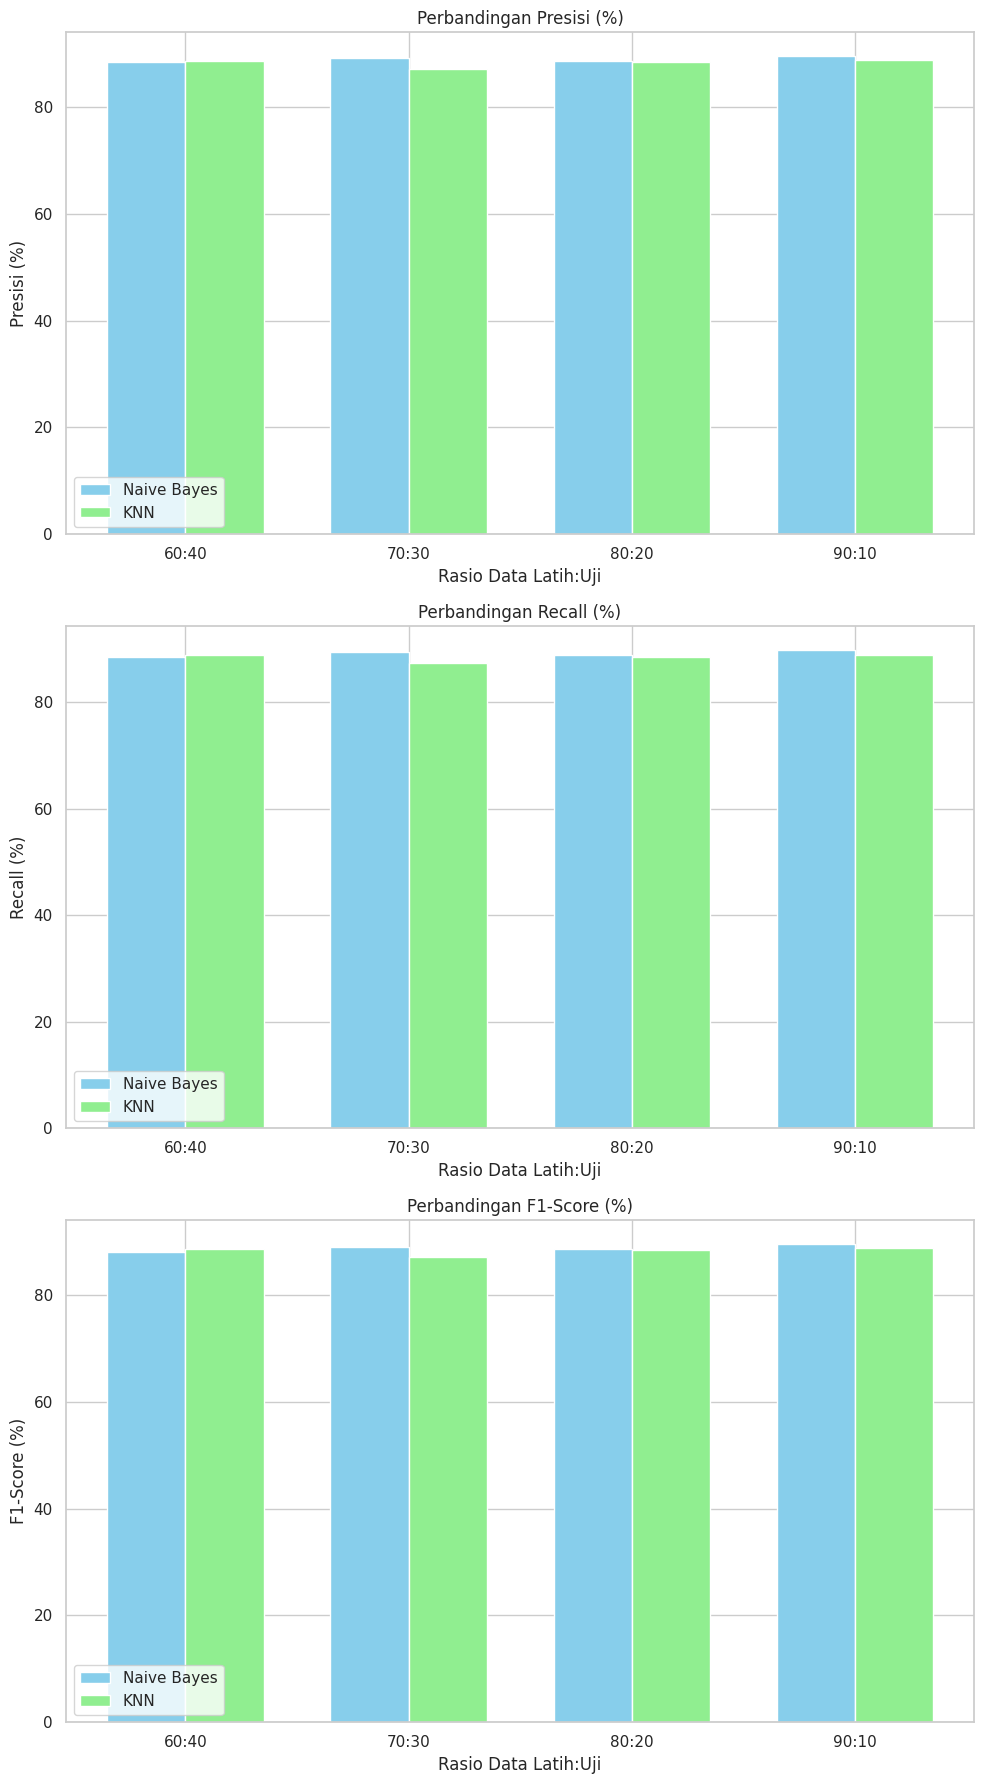

In [47]:
# Visualisasi bar chart
metrics = ['Presisi (%)', 'Recall (%)', 'F1-Score (%)']
x = np.arange(len(nb_df_float['Rasio (Latih:Uji)']))
width = 0.35

fig, axes = plt.subplots(3, 1, figsize=(10, 18))
for idx, metric in enumerate(metrics):
    axes[idx].bar(x - width/2, nb_df_float[metric], width, label='Naive Bayes', color='skyblue')
    axes[idx].bar(x + width/2, knn_df_float[metric], width, label='KNN', color='lightgreen')

    axes[idx].set_title(f'Perbandingan {metric}')
    axes[idx].set_xlabel('Rasio Data Latih:Uji')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(nb_df_float['Rasio (Latih:Uji)'])
    axes[idx].legend(loc='lower left')

plt.tight_layout()
plt.show()

## Visualisasi Prediksi Benar dan Salah (Confusion Matrix Stacked Bar)

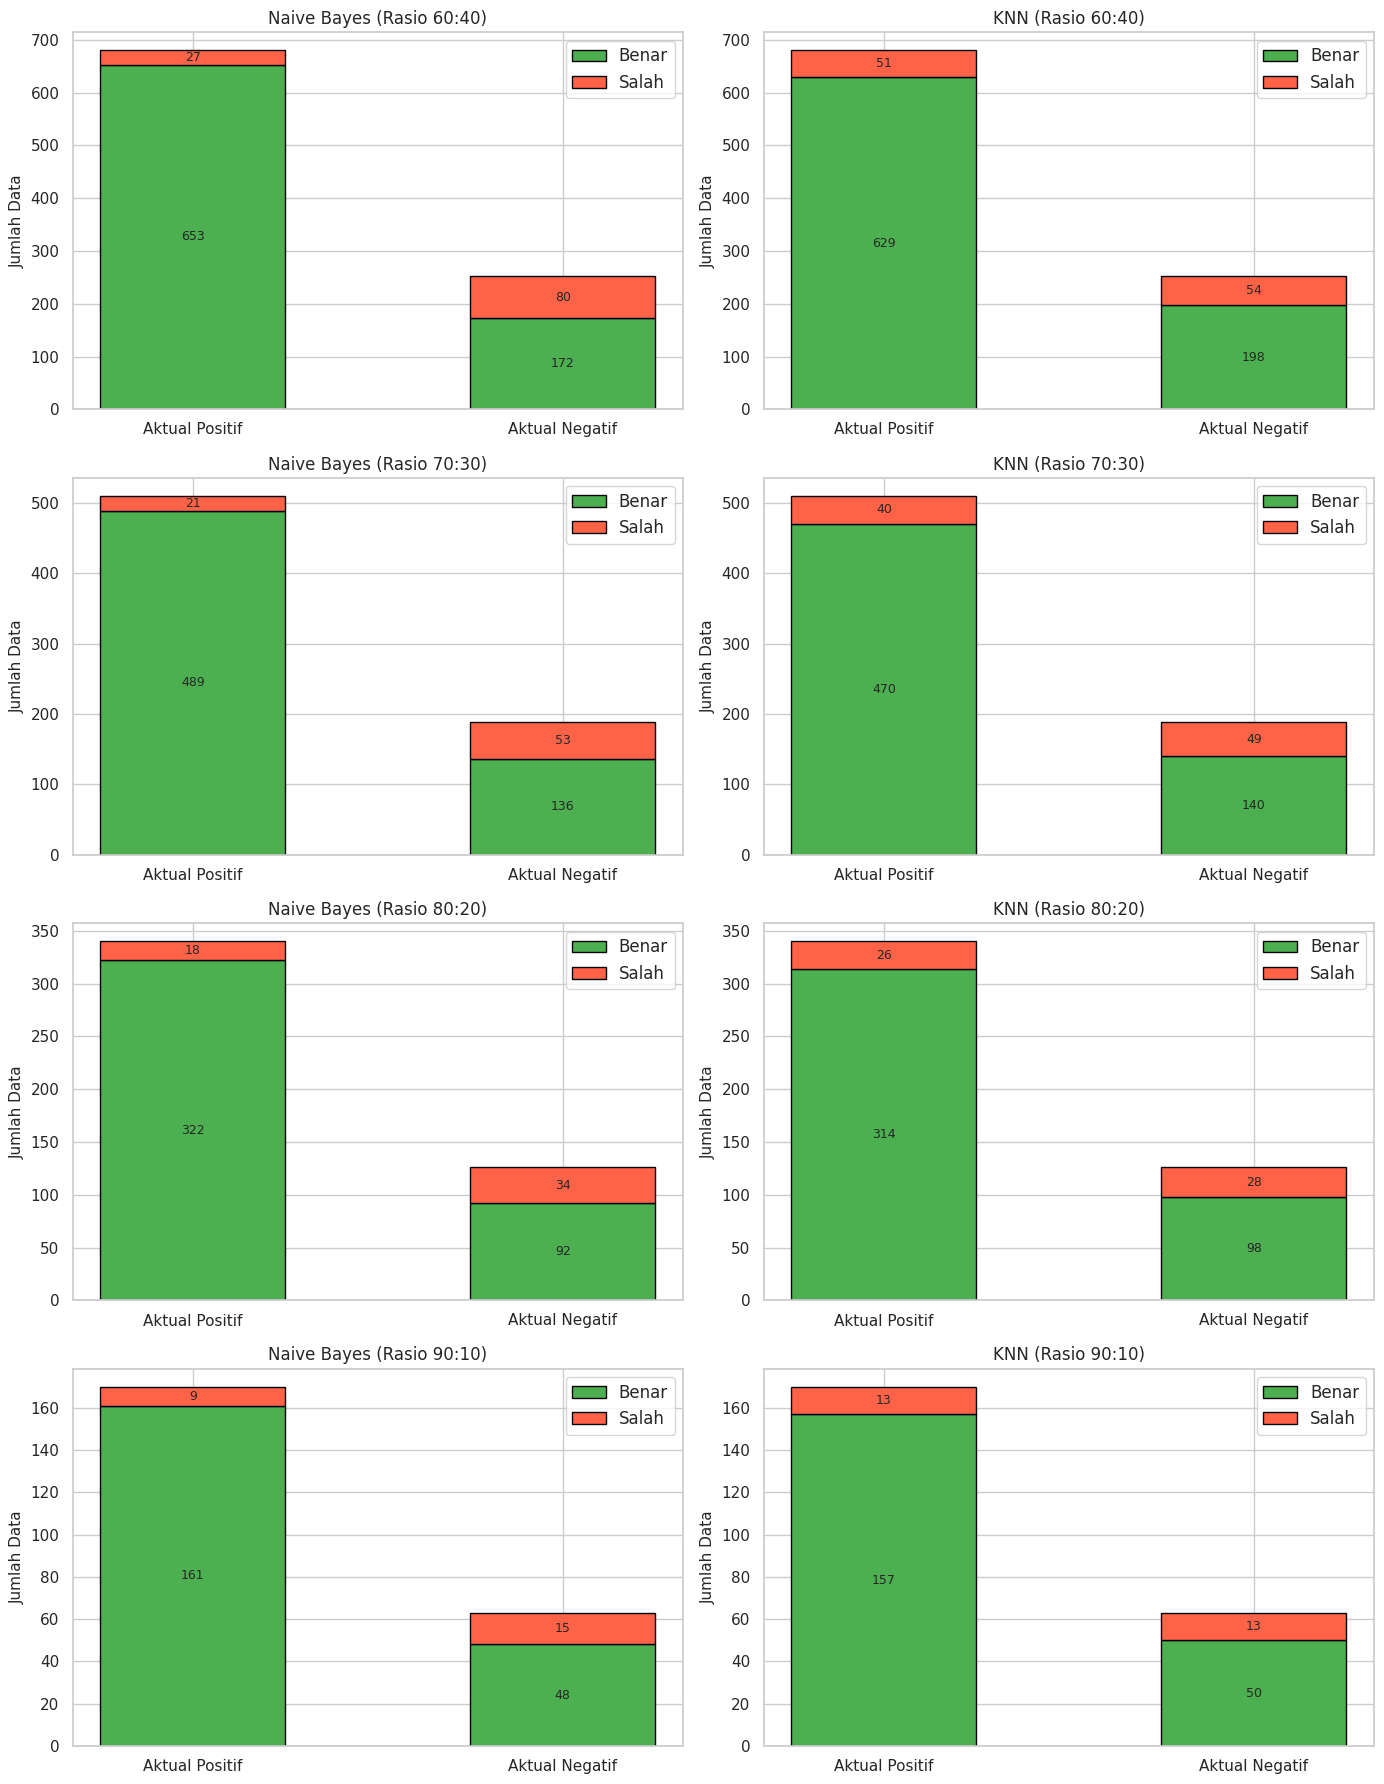

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Fungsi plot stacked bar
def plot_stacked_barchart(ax, y_true, y_pred, ratio, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Data aktual positif dan negatif
    bar_values = [ [tp, fn], [tn, fp] ]
    labels = ['Benar', 'Salah']
    colors = ['#4CAF50', '#FF6347']

    bar_width = 0.5
    indices = np.arange(2)
    bottom = np.zeros(2)

    for i in range(2):
        heights = [bar[i] for bar in bar_values]
        bars = ax.bar(indices, heights, bar_width,
                      bottom=bottom, label=labels[i], color=colors[i], edgecolor='black')
        for idx, bar in enumerate(bars):
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bottom[idx] + height/2,
                        f'{int(height)}', ha='center', va='center', fontsize=9)
        bottom += heights

    ax.set_ylabel('Jumlah Data', fontsize=11)
    ax.set_title(f"{model_name} (Rasio {int(round(ratio*100))}:{int(round((1-ratio)*100))})", fontsize=12)
    ax.set_xticks(indices)
    ax.set_xticklabels(['Aktual Positif', 'Aktual Negatif'])
    ax.legend(loc='upper right', fontsize=12)

# Gunakan data hasil prediksi yang sudah disimpan
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
axes = axes.ravel()

for i, ratio in enumerate(nb_preds.keys()):
    # Ambil hasil prediksi
    y_test_nb, y_pred_nb = nb_preds[ratio]
    y_test_knn, y_pred_knn = knn_preds[ratio]

    # Plot untuk Naive Bayes
    plot_stacked_barchart(axes[2*i], y_test_nb, y_pred_nb, ratio, "Naive Bayes")

    # Plot untuk KNN
    plot_stacked_barchart(axes[2*i+1], y_test_knn, y_pred_knn, ratio, "KNN")

plt.tight_layout()
plt.show()